# Estudio hiperparámetros LGC

"Learning with local and global consistency" by Dengyong Zhou, Olivier Bousquet, Thomas Lal, Jason Weston, and Bernhard Schölkopf. Published in Advances in Neural Information Processing Systems, Volume 16, 2003.

In [59]:
graph_method = 'gbili'

In [2]:
from metodos.GSSL.utils.Experiments import estudio_lgc_alpha, alpha_heatmap, names
import numpy as np
import os
from scipy.stats import rankdata

In [ ]:
for name in names:
    estudio_lgc_alpha(name, graph_method, parallel=True, path="../experimentos/lgc_alpha/"+graph_method+"/{}.npy")

In [60]:
matrix_names = []
all_matrix = []

for filename in os.listdir(f"lgc_alpha/{graph_method}/"):
    if not os.path.isdir(f"lgc_alpha/{graph_method}/" + filename):
        matrix_names.append(os.path.splitext(filename)[0])
        all_matrix.append(np.load(f"lgc_alpha/{graph_method}/" + filename))

all_matrix = np.array(all_matrix)
print(all_matrix.shape)

(23, 10, 4)


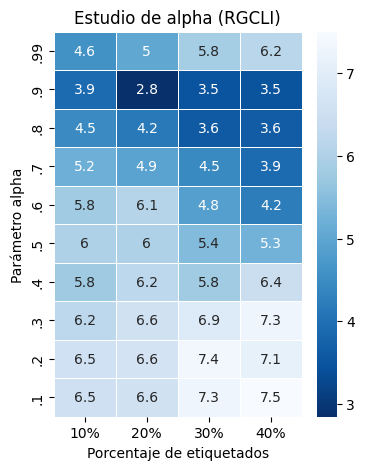

In [52]:
all_rankings = []
for a in all_matrix:
    all_rankings.append(rankdata(-a, axis=0))

mean_rankings = np.mean(all_rankings, axis=0)
alpha_heatmap(mean_rankings, f"Estudio de alpha ({graph_method.upper()})", more_better=False)

In [10]:
np.round(np.mean(mean_rankings, axis=1), 3)

array([5.408, 3.429, 3.967, 4.62 , 5.239, 5.668, 6.043, 6.734, 6.918,
       6.973])

In [61]:
prueba = np.zeros((10, 92))

for i in range(4):
    for j in range(len(all_matrix)):
        prueba[:, len(all_matrix) * i + j] = rankdata(-all_matrix[j][:, i], axis=0)

print(prueba.mean(axis=1))

[5.07608696 4.95652174 4.7826087  5.125      5.14673913 5.4076087
 5.8423913  5.85869565 6.27717391 6.52717391]


In [41]:
from matplotlib import pyplot as plt
import warnings
import pandas as pd
import scikit_posthocs as sp

def nemenyi_test(matrix, model_names, method):

    dict_data = {
        model_names[0]: matrix[0, :],
        model_names[1]: matrix[1, :],
        model_names[2]: matrix[2, :],
        model_names[3]: matrix[3, :],
        model_names[4]: matrix[4, :],
        model_names[5]: matrix[5, :],
        model_names[6]: matrix[6, :],
        model_names[7]: matrix[7, :],
        model_names[8]: matrix[8, :],
        model_names[9]: matrix[9, :]
    }
    
    data_list = [dict_data[key] for key in dict_data]

    results = np.array(data_list).T

    nemenyi_result = sp.posthoc_nemenyi_friedman(results)
    
    
    ranks = pd.DataFrame(results).rank(axis=1, method='average').mean(axis=0)
    ranks.index = list(dict_data.keys())
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 2), dpi=100)
        plt.title(f"Diferencias de rendimiento de {method} entre valores de alpha", pad=10)
        sp.critical_difference_diagram(ranks, nemenyi_result, label_fmt_left='{label} [{rank:.3f}]  ',
                                       label_fmt_right='  [{rank:.3f}] {label}')
        plt.show()

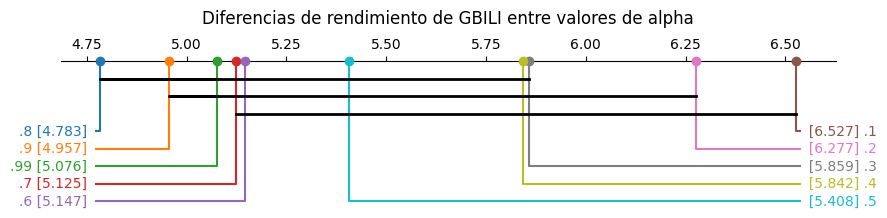

In [62]:
nemenyi_test(prueba, ['.99', '.9', '.8', '.7', '.6', '.5', '.4', '.3', '.2', '.1'], graph_method.upper())

In [7]:
directories = {
    'i_g': 'lgc_alpha/inductive/gbili/',
    'i_r': 'lgc_alpha/inductive/rgcli/',
    't_g': 'lgc_alpha/transductive/gbili/',
    't_r': 'lgc_alpha/transductive/rgcli/'
}

all_matrices = {}
for key, directory in directories.items():
    matrices = []
    for filename in os.listdir(directory):
        if not os.path.isdir(os.path.join(directory, filename)):
            matrices.append(np.load(os.path.join(directory, filename)))
    all_matrices[key] = np.array(matrices)

all_rankings = {}
for key, matrices in all_matrices.items():
    rankings = []
    for matrix in matrices:
        rankings.append(rankdata(-matrix, axis=0))
    all_rankings[key] = np.array(rankings)

mean_rankings = {}
for key, rankings in all_rankings.items():
    mean_rankings[key] = np.mean(rankings, axis=0)

alpha_mean_rankings = {}
for key, mean_ranking in mean_rankings.items():
    alpha_mean_rankings[key] = np.mean(mean_ranking, axis=1)

alpha_mean_ranking_i_g = alpha_mean_rankings['i_g']
alpha_mean_ranking_i_r = alpha_mean_rankings['i_r']
alpha_mean_ranking_t_g = alpha_mean_rankings['t_g']
alpha_mean_ranking_t_r = alpha_mean_rankings['t_r']

In [8]:
np.round(alpha_mean_ranking_i_g, 3)

array([6.435, 4.185, 4.103, 4.701, 4.755, 5.207, 5.739, 6.163, 6.571,
       7.141])

In [10]:
np.round(alpha_mean_ranking_i_r, 3)

array([5.408, 3.429, 3.967, 4.62 , 5.239, 5.668, 6.043, 6.734, 6.918,
       6.973])

In [9]:
np.round(alpha_mean_ranking_t_g, 3)

array([6.717, 4.196, 4.293, 4.462, 4.929, 5.212, 5.44 , 5.918, 6.652,
       7.179])

In [11]:
np.round(alpha_mean_ranking_t_r, 3)

array([5.766, 3.484, 3.527, 3.853, 4.511, 5.337, 6.457, 6.848, 7.217,
       8.   ])

## Estudiar alpha desde .8 a .99

In [ ]:
ya_ejecutados = []

for filename in os.listdir(f"lgc_alpha/{method}/{graph_method}/8-99"):
    ya_ejecutados.append(os.path.splitext(filename)[0])

faltan = list(set(names) - set(ya_ejecutados))

for name in names:
    estudio_lgc_alpha(name, method, graph_method, alpha_values=list(np.arange(.8,1,.01)), parallel=True, path="lgc_alpha/"+ method +"/"+graph_method+"/8-99/{}.npy")

In [6]:
matrix_names_8_99 = []
all_matrix_8_99 = []

for filename in os.listdir(f"lgc_alpha/{method}/{graph_method}/8-99"):
    matrix_names_8_99.append(os.path.splitext(filename)[0])
    all_matrix_8_99.append(np.load(f"lgc_alpha/{method}/{graph_method}/8-99/" + filename))

all_matrix_8_99 = np.array(all_matrix_8_99)
print(all_matrix_8_99.shape)

In [7]:
all_rankings_8_99 = []
for a in all_matrix_8_99:
    all_rankings_8_99.append(rankdata(-a, axis=0))

mean_rankings_8_99 = np.mean(all_rankings_8_99, axis=0)
alpha_heatmap(mean_rankings_8_99, f"Estudio de alpha ({graph_method.upper()})", more_better=False,
              w_labels=['.99', '.98', '.97', '.96', '.95', '.94', '.93', '.92', '.91', '.90',
                        '.89', '.88', '.87', '.86', '.85', '.84', '.83', '.82', '.81', '.80']
              )

In [8]:
np.mean(mean_rankings_8_99, axis=1)